In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set() # setting seaborn default for plots

# read the data

In [2]:
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# exploring data 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.shape

(891, 12)

# showing the null values


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# checking duplicates

In [61]:
d = df.duplicated()
print(d)

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool


In [8]:
def bar_chart(feature):
    survived = df[df['Survived']==1][feature].value_counts()
    dead = df[df['Survived']==0][feature].value_counts()
    bar = pd.DataFrame([survived,dead])
    bar.index = ['Survived','Dead']
    bar.plot(kind='bar',stacked=True, figsize=(10,5))

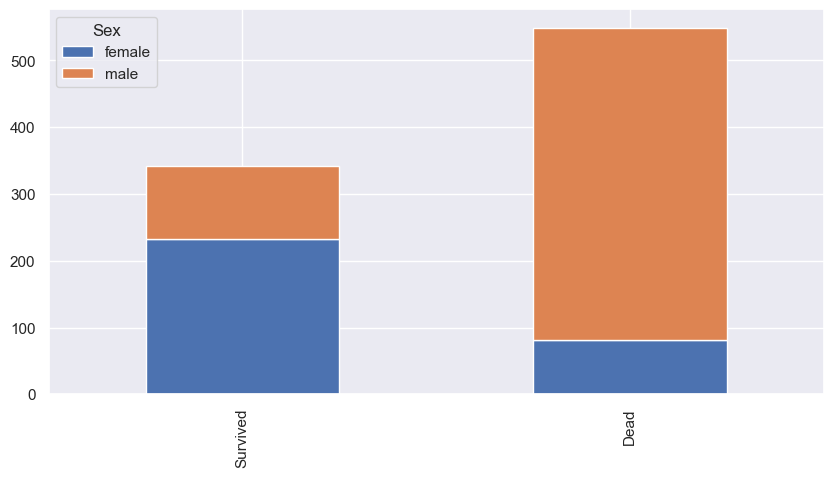

In [9]:
bar_chart('Sex')

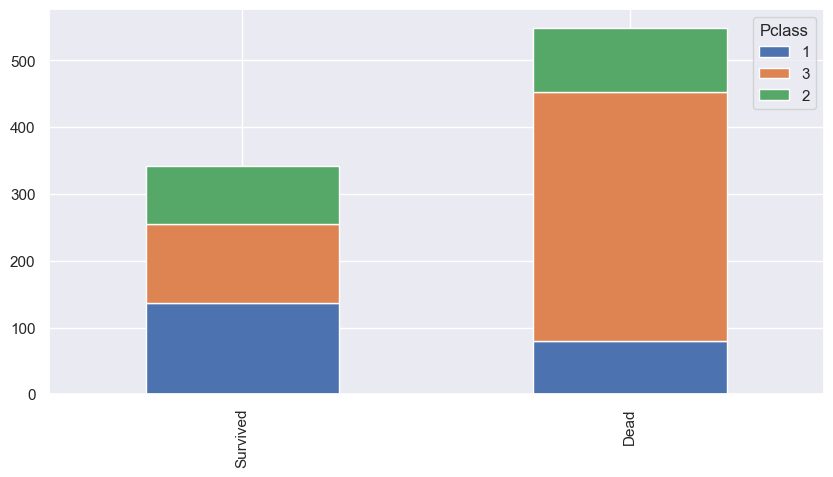

In [10]:
bar_chart('Pclass')

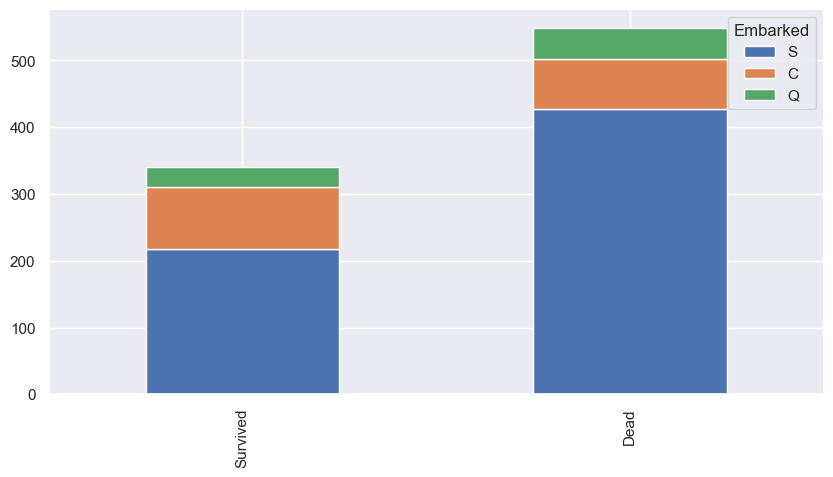

In [11]:
bar_chart('Embarked')

# convert names 

In [12]:
data = [df] 

for dataset in data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [13]:
df['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

# Title map
  #Mr : 0   
  #Miss : 1   
  #Mrs: 2   
  #Others: 3   

In [14]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [15]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,2


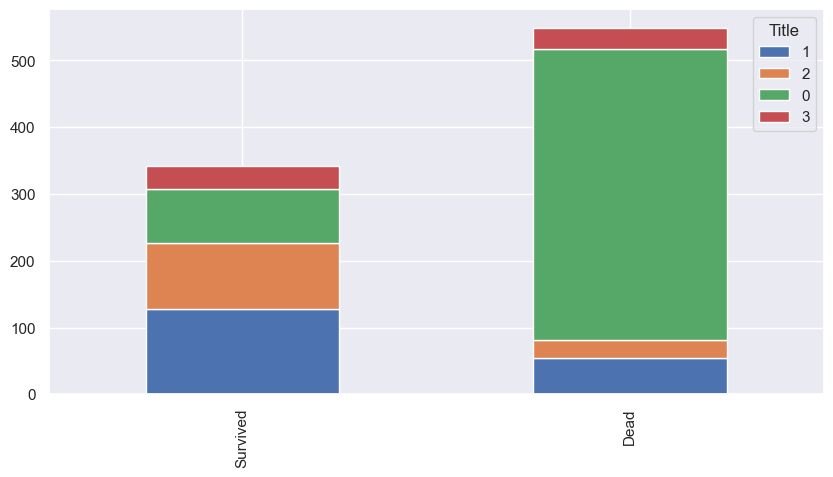

In [16]:
bar_chart('Title')


# deleting unnecessary feature (name)

In [17]:
df.drop('Name', axis=1, inplace=True)

In [18]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,male,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,female,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,female,14.0,1,0,237736,30.0708,NaN,C,2



# sex map
male = 0    
female = 1



In [19]:
sex_mapping = {"male": 0, "female": 1}
for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [20]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,14.0,1,0,237736,30.0708,NaN,C,2


# fill the missing values (age)

In [21]:
# fill missing age with mean age for each title (Mr, Mrs, Miss, Others)
df["Age"].fillna(df.groupby("Title")["Age"].transform("mean"), inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [23]:
df.tail(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
886,887,0,2,0,27.000000,0,0,211536,13.00,NaN,S,3
887,888,1,1,1,19.000000,0,0,112053,30.00,B42,S,1
888,889,0,3,1,21.773973,1,2,W./C. 6607,23.45,NaN,S,1
889,890,1,1,0,26.000000,0,0,111369,30.00,C148,C,0
890,891,0,3,0,32.000000,0,0,370376,7.75,NaN,Q,0


In [24]:
df["Age"] = df["Age"].round().astype(int)

In [25]:
df.tail(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
886,887,0,2,0,27,0,0,211536,13.00,NaN,S,3
887,888,1,1,1,19,0,0,112053,30.00,B42,S,1
888,889,0,3,1,22,1,2,W./C. 6607,23.45,NaN,S,1
889,890,1,1,0,26,0,0,111369,30.00,C148,C,0
890,891,0,3,0,32,0,0,370376,7.75,NaN,Q,0


In [26]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

# age map 
child: 0   
young: 1    
adult: 2   
mid-age: 3  
senior: 4  

In [27]:
for dataset in data:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
    dataset.loc[dataset['Age'] > 62, 'Age'] = 4


In [28]:
df.head(8)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,2,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,3,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,0,3,1,349909,21.0750,NaN,S,3


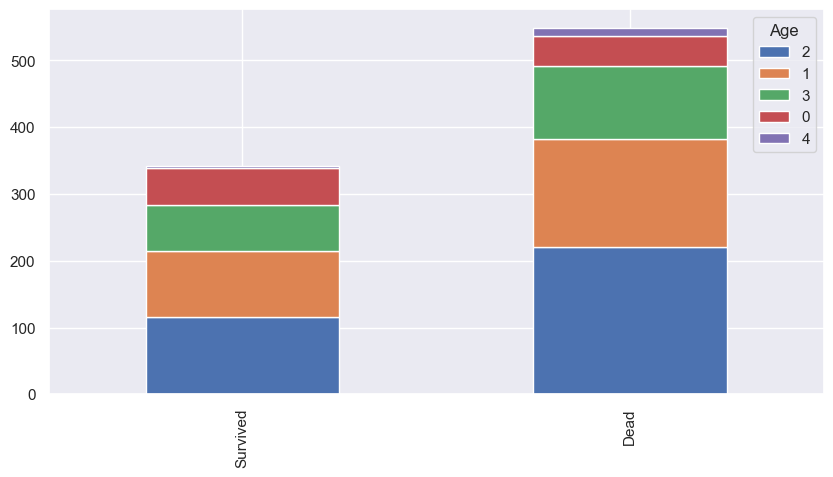

In [29]:
bar_chart('Age')

# fill missing values (embark)

<Axes: >

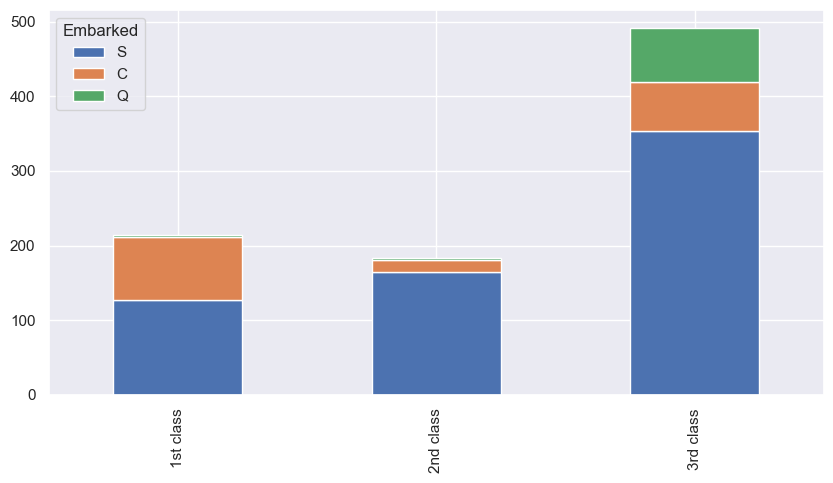

In [30]:
Pclass1 = df[df['Pclass']==1]['Embarked'].value_counts()
Pclass2 = df[df['Pclass']==2]['Embarked'].value_counts()
Pclass3 = df[df['Pclass']==3]['Embarked'].value_counts()
df_emb = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df_emb.index = ['1st class','2nd class', '3rd class']
df_emb.plot(kind='bar',stacked=True, figsize=(10,5))

#### more than 50% of 1st class are from S embark
#### more than 50% of 2nd class are from S embark
#### more than 50% of 3rd class are from S embark

In [31]:
#fill the missing value with 'S' 
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [32]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

# embarked map 
"S": 0  
"C": 1  
"Q": 2 

In [33]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [34]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2,0,0,373450,8.0500,NaN,0,0


In [35]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

# exploring cabin 

In [36]:
df.Cabin.value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [37]:
for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

In [38]:
df.Cabin.value_counts()

Cabin
C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64

<Axes: >

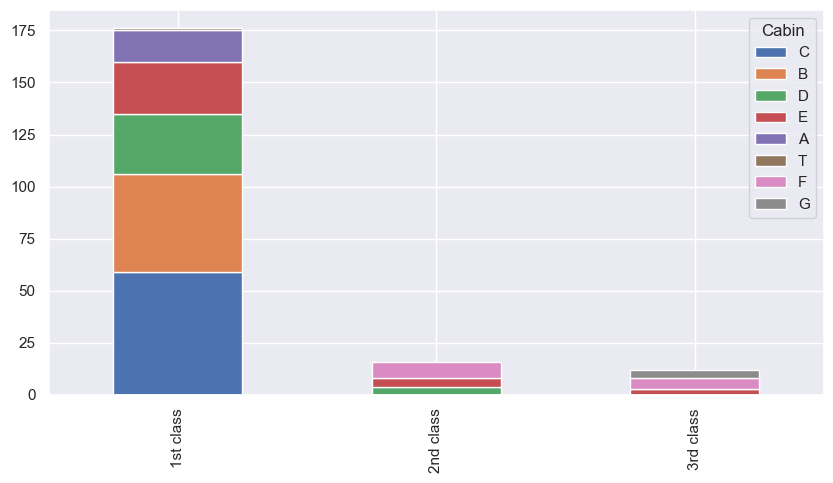

In [39]:
Pclass1 = df[df['Pclass']==1]['Cabin'].value_counts()
Pclass2 = df[df['Pclass']==2]['Cabin'].value_counts()
Pclass3 = df[df['Pclass']==3]['Cabin'].value_counts()
df_cab = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df_cab.index = ['1st class','2nd class', '3rd class']
df_cab.plot(kind='bar',stacked=True, figsize=(10,5))

# cabin_mapping 
"A": 0   
"B": 1   
"C": 2   
"D": 3    
"E": 4  
"F": 5  
"G": 6   
"T": 7  

In [40]:
cabin_mapping = {"A": 0, "B": 1, "C": 2, "D": 3, "E": 4, "F":5, "G": 6, "T":7 }
for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [41]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3,1,0,PC 17599,71.2833,2.0,1,2
2,3,1,3,1,1,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2,1,0,113803,53.1000,2.0,0,2
4,5,0,3,0,2,0,0,373450,8.0500,NaN,0,0


# fill the missing values (cabin)

In [42]:
df["Cabin"].fillna(df.groupby("Pclass")["Cabin"].transform("median").round(), inplace=True)

In [43]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1,1,0,A/5 21171,7.2500,5.0,0,0
1,2,1,1,1,3,1,0,PC 17599,71.2833,2.0,1,2
2,3,1,3,1,1,0,0,STON/O2. 3101282,7.9250,5.0,0,1
3,4,1,1,1,2,1,0,113803,53.1000,2.0,0,2
4,5,0,3,0,2,0,0,373450,8.0500,5.0,0,0


In [44]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

no null values ✅

In [45]:
df.head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1,1,0,A/5 21171,7.2500,5.0,0,0
1,2,1,1,1,3,1,0,PC 17599,71.2833,2.0,1,2
2,3,1,3,1,1,0,0,STON/O2. 3101282,7.9250,5.0,0,1
3,4,1,1,1,2,1,0,113803,53.1000,2.0,0,2
4,5,0,3,0,2,0,0,373450,8.0500,5.0,0,0
5,6,0,3,0,2,0,0,330877,8.4583,5.0,2,0
6,7,0,1,0,3,0,0,17463,51.8625,4.0,0,0
7,8,0,3,0,0,3,1,349909,21.0750,5.0,0,3
8,9,1,3,1,2,0,2,347742,11.1333,5.0,0,2
9,10,1,2,1,0,1,0,237736,30.0708,4.0,1,2


# Questions : 

1. What is the distribution of survival based on gender?

2. What is the survival rate based on passenger class?

3. *How does the embarkation port affect survival?

4. What is the survival rate based on the number of siblings/spouses (SibSp) and parents/children (Parch) combined?

5. What titles do passengers have, and how does it relate to survival?
6. What is the distribution of passengers by age group
   
7. What is the survival rate of passengers based on their age group

8. Is there a correlation between fare and survival rate?

9. What is the average fare paid by passengers in each passenger class?

10. Is there a correlation between family size and survival rate?

11. What is the average age of passengers on board?

12. How many passengers were traveling alone?

13. What is the survival rate of passengers with cabins versus those without cabins?

14. what is the max min and avg number of people per cabin?

15. What is the distribution of passengers' fares?









# ---------------------------------------------------------------------------------------------------------------

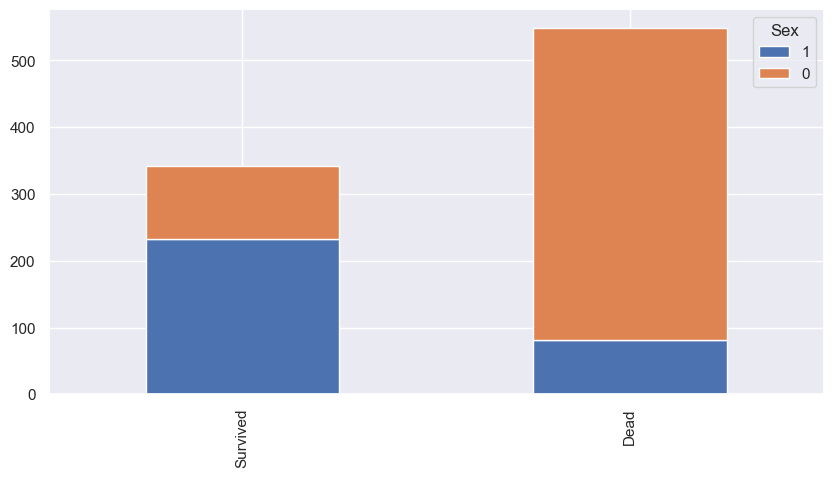

In [46]:
# 1. What is the distribution of survival based on gender? 
bar_chart('Sex')

females are the most survived 

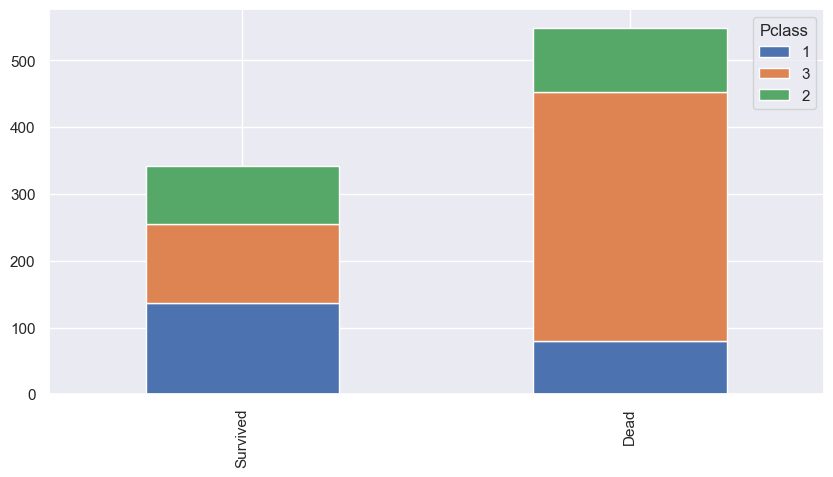

In [47]:
# 2. What is the survival rate based on passenger class?
bar_chart('Pclass')

the most survival rate was at fisrt class ticket

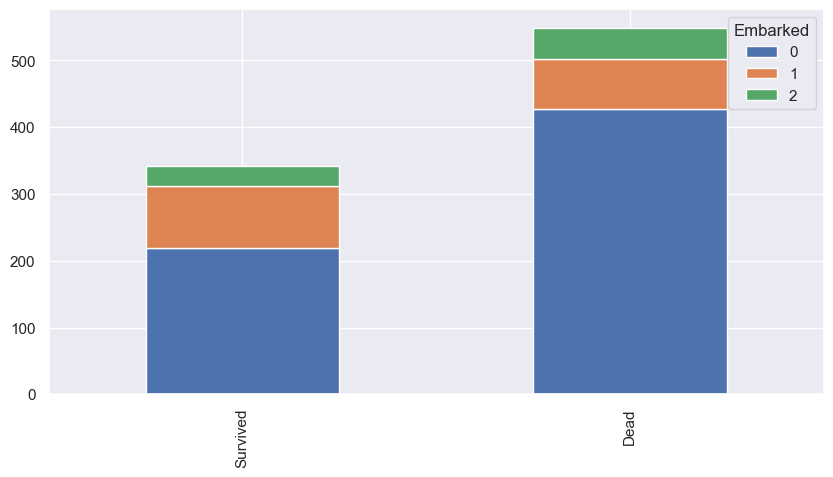

In [48]:
# 3. How does the embarkation port affect survival?
bar_chart('Embarked')

the most survived and dead people were from south hampton  

<Axes: xlabel='FamilySize', ylabel='Survived'>

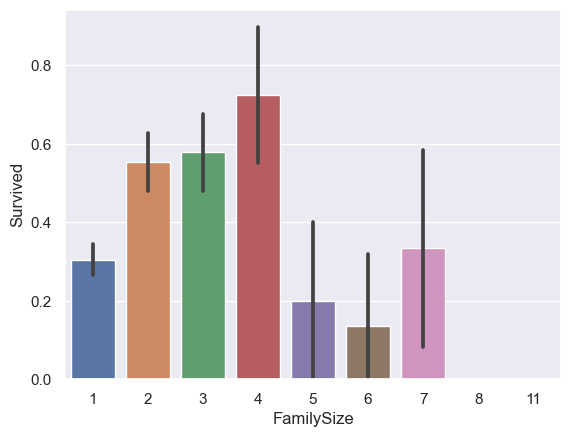

In [49]:
# 4. What is the survival rate based on the number of siblings/spouses (SibSp) and parents/children (Parch) combined?
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
sns.barplot(x='FamilySize', y='Survived', data=df)

people who had family size of 4 persons are the most survived 

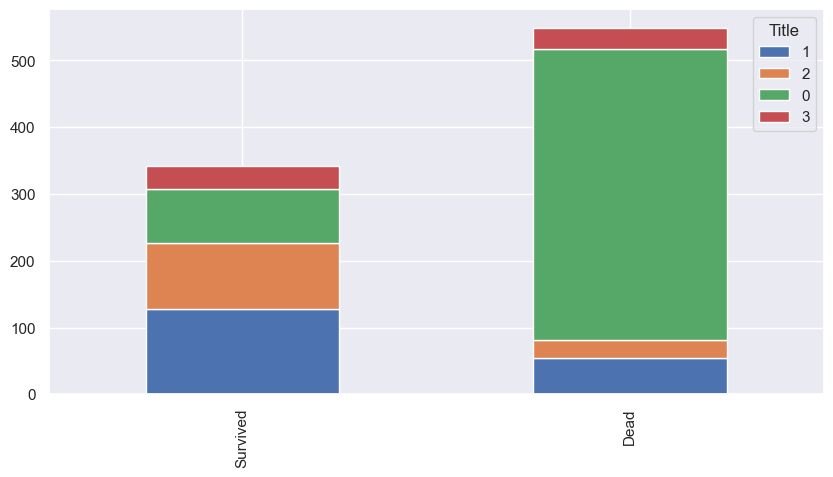

In [50]:
# 5. What titles do passengers have, and how does it relate to survival?
bar_chart('Title')

most suvived who had title 'miss' and who had title 'mr' are had the most dead rate 

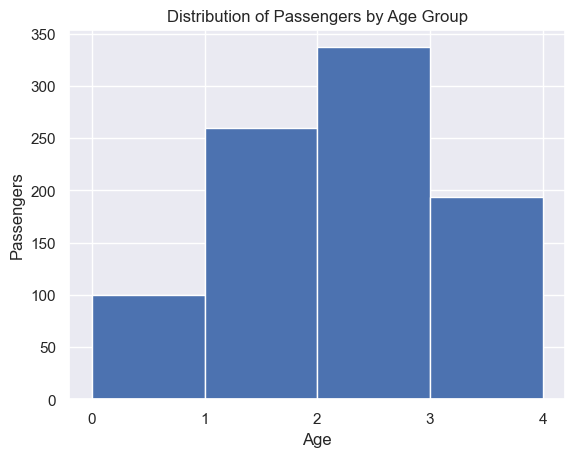

In [51]:
#6 .What is the distribution of passengers by age group
bins = [0,1,2,3,4] 
plt.hist(df['Age'], bins=bins)
plt.xlabel('Age')
plt.ylabel('Passengers')
plt.title('Distribution of Passengers by Age Group')
plt.xticks(bins)
plt.show()




In [52]:
#7 What is the survival rate of passengers based on their age group
bins = [0, 1, 2, 3, 4]  
labels = ['child', 'young', 'adult', 'mid-age']


df['Age_Group'] = pd.cut(df['Age'], bins=bins, )


survival_rate = df.groupby('Age_Group')['Survived'].mean() * 100 

print("Survival Rate by Age Group:")
print(survival_rate)

Survival Rate by Age Group:
Age_Group
(0, 1]    38.076923
(1, 2]    34.421365
(2, 3]    38.547486
(3, 4]    20.000000
Name: Survived, dtype: float64


C:\Users\seife\AppData\Local\Temp\ipykernel_20824\3325789728.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate = df.groupby('Age_Group')['Survived'].mean() * 100


In [53]:
#8 Is there a correlation between fare and survival rate?

 
correlation = df['Fare'].corr(df['Survived'])

print(correlation)

0.2573065223849623


In [54]:
#9What is the average fare paid by passengers in each passenger class?

average = df.groupby("Pclass")["Fare"].mean()
print(average)

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


In [55]:
#10 Is there a correlation between family size and survival rate?
correlation = df['FamilySize'].corr(df['Survived'])

print(correlation)

0.01663898928274532


In [56]:
#11 What is the average age of passengers on board?
average_age = df["Age"].mean()
print("Average age of passengers on board:", round(average_age, 2))



Average age of passengers on board: 1.72


In [57]:
#12 How many passengers were traveling alone?
df['FamilySize'] = df['SibSp'] + df['Parch']
passengers_alone = df[df['FamilySize'] == 0]['PassengerId'].count()
print("Number of passengers traveling alone:", passengers_alone)


Number of passengers traveling alone: 537


In [58]:
#13 What is the survival rate of passengers with cabins versus those without cabins?

survival_rate_with_cabin = df[df['Cabin'].notnull()]['Survived'].mean()
survival_rate_without_cabin = df[df['Cabin'].isnull()]['Survived'].mean()
print("Survival rate of passengers with cabins:", survival_rate_with_cabin)
print("Survival rate of passengers without cabins:", survival_rate_without_cabin)

Survival rate of passengers with cabins: 0.3838383838383838
Survival rate of passengers without cabins: nan


In [59]:
#14what is the max min and avg number of people per cabin?
passengers_per_cabin = df.groupby('Cabin')['PassengerId'].nunique()
max_people_per_cabin = passengers_per_cabin.max()
min_people_per_cabin = passengers_per_cabin.min()
avg_people_per_cabin = passengers_per_cabin.mean()
print("Maximum number of people per cabin:", max_people_per_cabin)
print("Minimum number of people per cabin:", min_people_per_cabin)
print("Average number of people per cabin:", avg_people_per_cabin)

Maximum number of people per cabin: 492
Minimum number of people per cabin: 1
Average number of people per cabin: 111.375


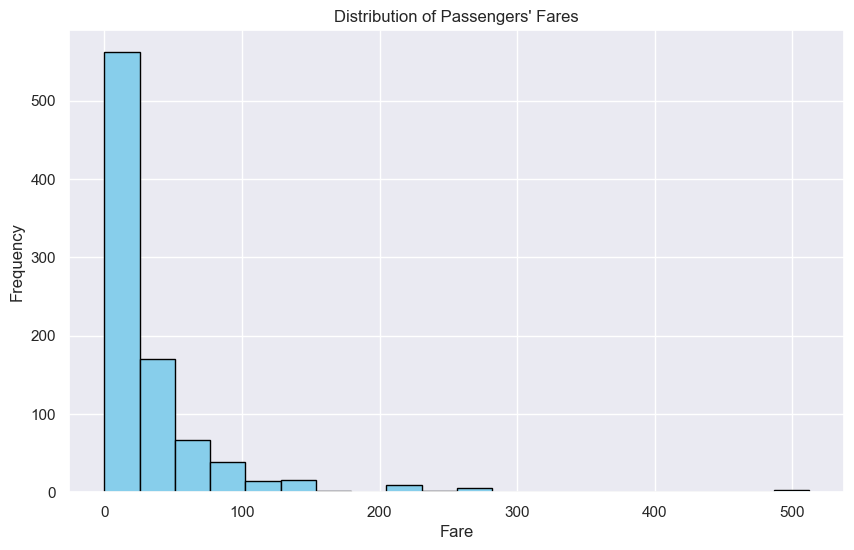

In [60]:
#15 What is the distribution of passengers' fares?
plt.figure(figsize=(10, 6))
plt.hist(df['Fare'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Passengers\' Fares')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
